## Project Stage - III (Distributions and Hypothesis Testing)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats

## Task 1: Distribution Analysis (50 pts)     

In [2]:
#read the super data file
super_df = pd.read_csv("../../../../data/stage_3/super_df.csv")

### Split the county and state for better calculation and visualization

In [3]:
super_df[["County", "State"]] = super_df["County"].str.split(",",expand = True)
super_df["State"] = super_df["State"].str.lstrip()

#### Filter for NC and KY state from the dataframe 

In [4]:
NC_df = super_df[super_df["State"].isin(['NC'])]
NC_df.State.unique()

array(['NC'], dtype=object)

In [5]:
KY_df = super_df[super_df["State"].isin(['KY'])]
KY_df.State.unique()

array(['KY'], dtype=object)

## M1.1 Compare NC and KY on Opioid Mortality - 2019 Data (20 pts)

#### Plot the histogram for each of the state to understand the distribution

###### NC State Histogram

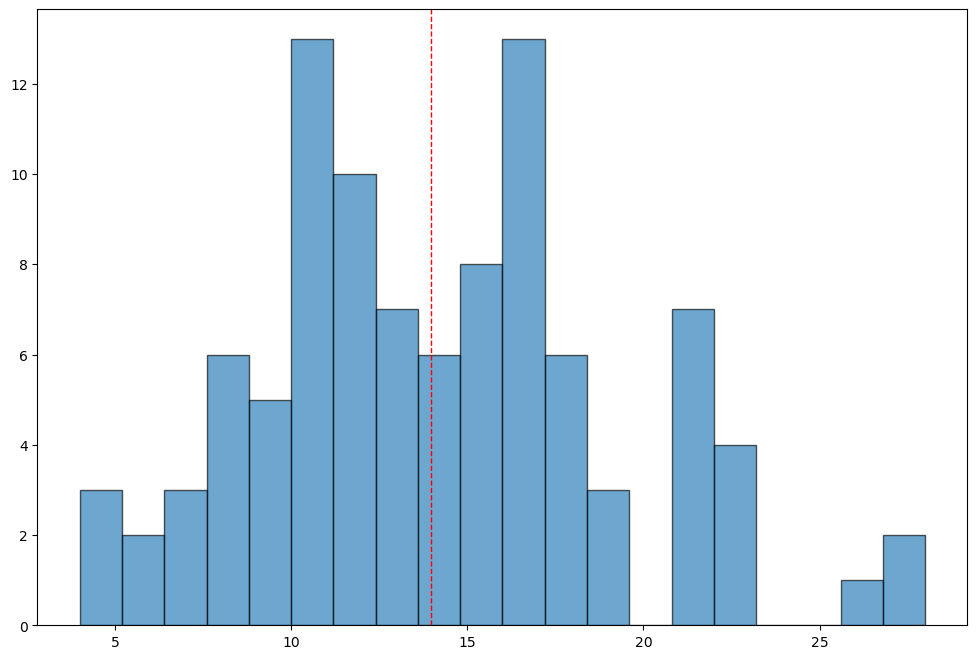

In [6]:
plt.figure(figsize=(12,8))
plt.hist(NC_df.Norm_deaths , bins=20, edgecolor='k', alpha=0.65)
plt.axvline(NC_df.Norm_deaths.mean(), color='r', linestyle='dashed', linewidth=1)

###### KY State Histogram

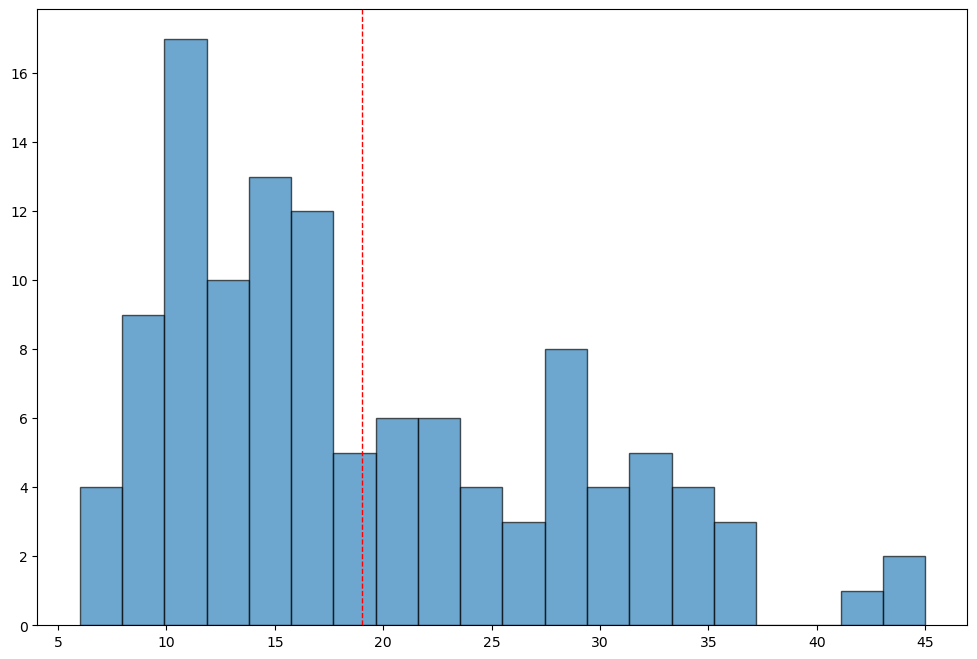

In [7]:
plt.figure(figsize=(12,8))
plt.hist(KY_df.Norm_deaths , bins=20, edgecolor='k', alpha=0.65)
plt.axvline(KY_df.Norm_deaths.mean(), color='r', linestyle='dashed', linewidth=1) 

In [8]:
print(NC_df.Norm_deaths.mean())
print(KY_df.Norm_deaths.mean())

13.97979797979798
19.04310344827586


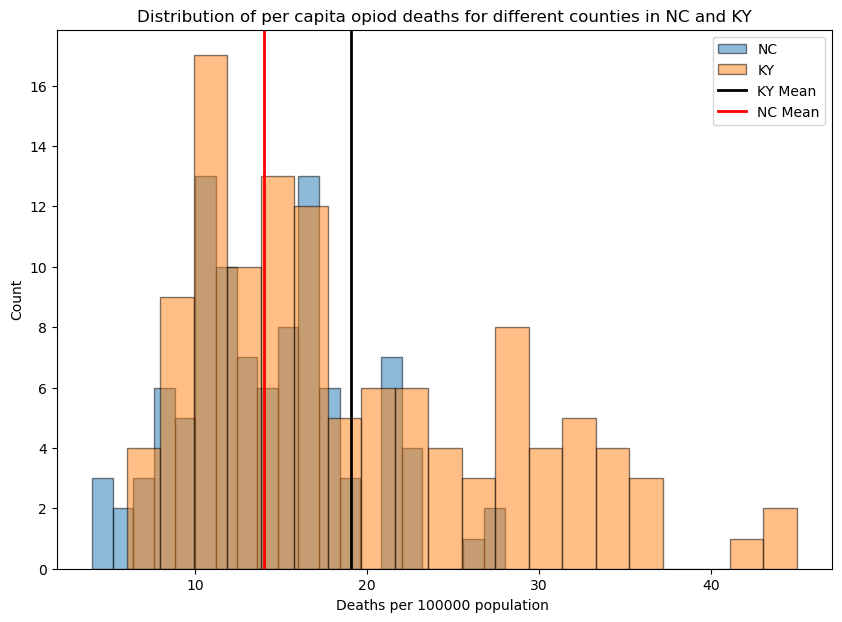

In [9]:
plt.figure(figsize=(10,7))

plt.hist(NC_df.Norm_deaths, bins=20, edgecolor='k', alpha=0.5, label='NC')
plt.hist(KY_df.Norm_deaths, bins=20, edgecolor='k', alpha=0.5, label='KY')
plt.axvline(KY_df.Norm_deaths.mean(), color='black', linewidth=2, label='KY Mean') 
plt.axvline(NC_df.Norm_deaths.mean(), color='red',  linewidth=2, label='NC Mean') 
plt.legend(loc='upper right')
plt.title('Distribution of per capita opiod deaths for different counties in NC and KY')
plt.xlabel('Deaths per 100000 population ')
plt.ylabel('Count')
plt.show()

With concatenation we can calculate the sample mean to understand the entire country population. Its always said that sample mean give approximately same mean as that of population. So here we are trying to understand the deaths of the nation by getting the sample of the population. This is known as sampling


In [10]:
#mean of both the datasets
sample_deaths = np.concatenate((NC_df.Norm_deaths, KY_df.Norm_deaths))
print(sample_deaths.mean())

16.711627906976744


### Inference:




* From the graph we observe that the distributions overlap each other approximately symmetrically.
* We can say that NC and KY distributions are same i.e the death rate in both the states is approx. the same. 
* Since, death is a discrete variable the distribution should be discrete. I am considering Poisson distribution for this data as death is related to time and we are trying to find the probability of deaths in a given interval of time say 1 month , 2 month , 3 month and so on. Since the deaths rate is associated with time so we can use poisson distribution for each of the states. 
* The data is looks like normally distributed with 2 peaks, one  for each state. The zero tells us that the death values went on declining in the later stages of the year.

* With mean of NC and KY equal to 13.979 & 19.043 tell us that the death rate for each of the state in 2019.

## M1.2 Evaluate a distribution for the Normalized Mortality Rate (20 pts)

#### Choose a distribution for Normalized Mortality Rate

The Poisson distribution is a discrete distribution that measures the probability of a given number of events happening in a specified time period. Here we are checking the probability of deaths per year. I tried to use other distributions for discrete like bionomial but the distribution didnt fit well as in bionomial we are checking the probability of getting a variable as success. Thus poisson fits the best for the dataset that we have. 

### MOM  for NC and KY

#### To perform this task I used the superdata and filtered for two states that is NC and KY.

In [11]:
#filter the data 
NC_df = super_df[super_df["State"].isin(['NC'])]
NC_df.State.unique()

array(['NC'], dtype=object)

#### I am considering the distribution to be poisson as we are trying to determine the probability of deaths in specific interval of time. In poisson the only parameter required is lamda which is found equal to mean of the normalised deaths. Hence I plot the histogram with the MOM parameter as mean and see how well the distribution fits the data.  I check the same for both the states i.e NC and KY. 

In [12]:
KY_df = super_df[super_df["State"].isin(['KY'])]
KY_df.State.unique()

array(['KY'], dtype=object)

In [13]:
#calculate the mean for NC
lamda1 = NC_df.Norm_deaths.mean()

In [14]:
#calculate the mean for KY
lamda2 = KY_df.Norm_deaths.mean()

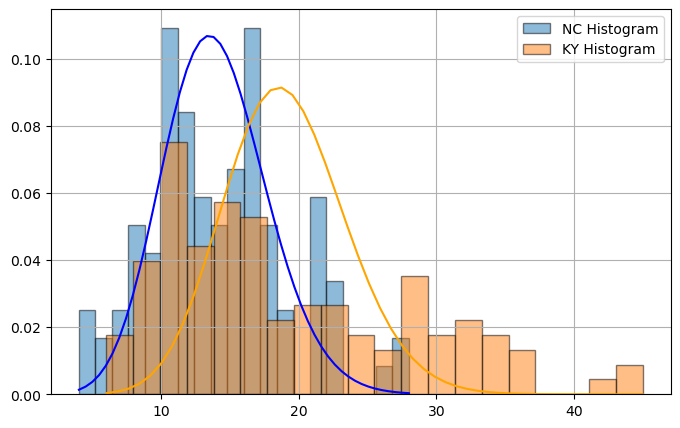

In [15]:
from scipy.stats.distributions import poisson
NC_df.Norm_deaths.hist(density=True, bins=20, ec='black', alpha=0.5 ,   label = "NC Histogram" , figsize=(12,8))
plt.plot(np.linspace(NC_df.Norm_deaths.min(), NC_df.Norm_deaths.max()), poisson.pmf(np.linspace(NC_df.Norm_deaths.min(),NC_df.Norm_deaths.max()), lamda1) , color = "blue")
KY_df.Norm_deaths.hist(density=True, bins=20, ec='black', figsize=(8,5) , label = "KY Histogram" ,alpha=0.5)
plt.plot(np.linspace(KY_df.Norm_deaths.min(), KY_df.Norm_deaths.max()), poisson.pmf(np.linspace(KY_df.Norm_deaths.min(), KY_df.Norm_deaths.max()), lamda2) , color = "orange")
plt.legend()

### MLE for NC and KY

For MLE as well the parameter is mean and hence we plot the distribution for NC and KY using the Normalized deaths

In [16]:
NC_mean_mle = NC_df.Norm_deaths.mean()
print(NC_mean_mle)

KY_lamda = KY_df.Norm_deaths.mean()
print(KY_lamda)

13.97979797979798
19.04310344827586


C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\2893161897.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  l1,=plt.plot(x,poisson.pmf(x, NC_mean_mle), 'r--',  label="Maximum Likelihood Estimate for NC" ,  color = "blue")
C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\2893161897.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  l2,=plt.plot(x, poisson.pmf(x, KY_lamda), 'b--',  label="Maximum Likelihood Estimate for KY" ,  color = "orange")


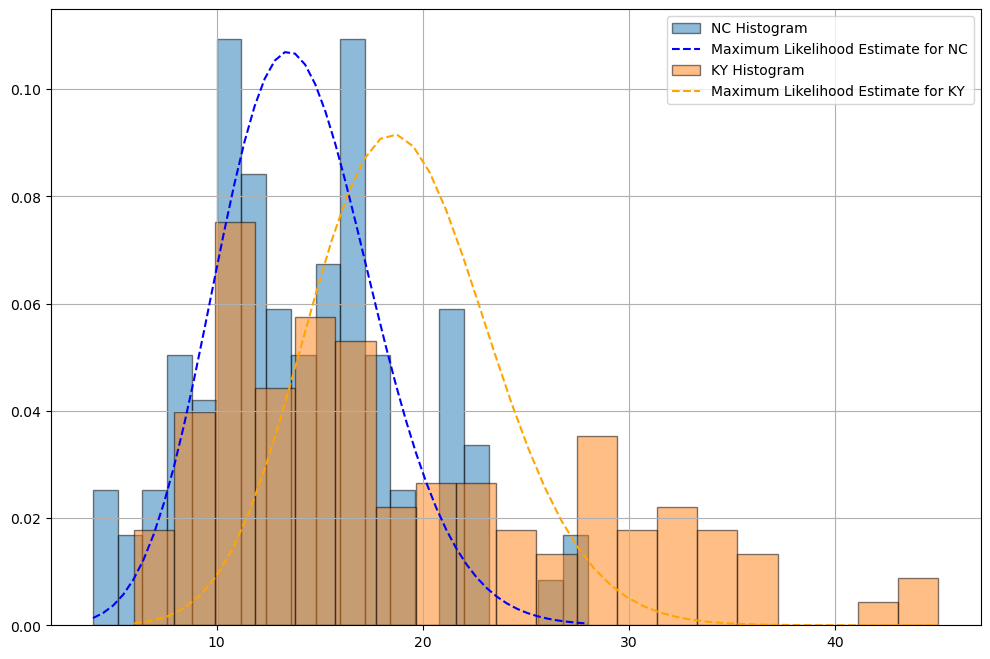

In [17]:
NC_df.Norm_deaths.hist(density=True, bins=20, ec='black', figsize=(12,8) , alpha=0.5 , label="NC Histogram")
x = np.linspace(NC_df.Norm_deaths.min(), NC_df.Norm_deaths.max())
l1,=plt.plot(x,poisson.pmf(x, NC_mean_mle), 'r--',  label="Maximum Likelihood Estimate for NC" ,  color = "blue")

KY_df.Norm_deaths.hist(density=True, bins=20, ec='black', figsize=(12,8) , alpha=0.5 , label = "KY Histogram")
x = np.linspace(KY_df.Norm_deaths.min(), KY_df.Norm_deaths.max())
l2,=plt.plot(x, poisson.pmf(x, KY_lamda), 'b--',  label="Maximum Likelihood Estimate for KY" ,  color = "orange")
plt.legend()

#### KDE for NC and KY

C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\2224901416.py:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(NC_kde, bw_method=None)
C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\2224901416.py:13: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(KY_kde, bw_method=None)


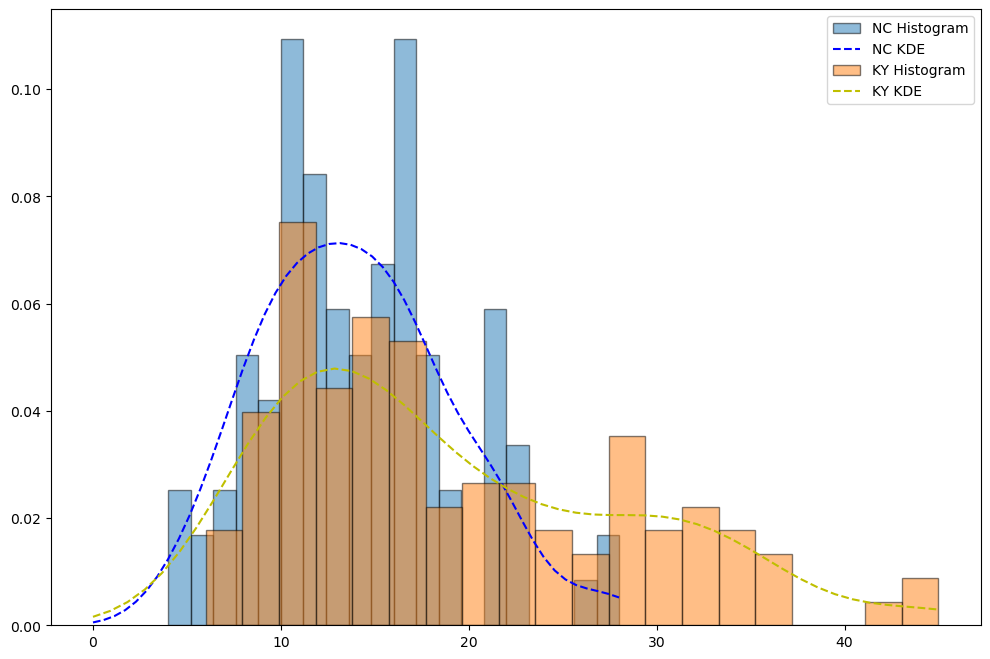

In [18]:
from scipy.stats import kde

NC_kde = NC_df.Norm_deaths
NC_kde.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8) , alpha=0.5 , label="NC Histogram")
x = np.linspace(0, NC_kde.max())
density = kde.gaussian_kde(NC_kde, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'b--' ,  label = "NC KDE")

KY_kde = KY_df.Norm_deaths
KY_kde.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8) , alpha=0.5 , label="KY Histogram")
x = np.linspace(0, KY_kde.max())
density = kde.gaussian_kde(KY_kde, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'y--' , label = "KY KDE")

plt.legend()

### Inference

 Essentially an estimate of the mean and variance of the distribution calculated using the sample data is what the estimator corresponds to and this can be generated using different paramaters. Based on the type of distribution parameters are chosen.
 
 * MOM 
   *  Since we are checking the death rate with time I am using poisson distribution to find the estimator. In MOM, the estimator parameter for MOM is lamda which is nothing but the mean of the deaths column in our dataset. 
   * For NC and KY, we see that the probability of getting the mean is 0.10 and 0.9. 
   * The NC histogram fits well with the data but KY seems not to best fit the distribution.
   * Thus, we check for other methods where the data can fit well. 
  
 * MLE 
      * In MLE we try to maximize the theta parameter. Since the distribution chosen in MLE is lamda which is again the mean of the deaths column. We try to locate the mean and see the probability of getting that mean in the distribution. This way we are trying to maximize the MLE parameter that is the mean. 
      * IN NC and KY, The NC distribution fits well with the MLE but for KY the its found to be move towards right and doesnt fit the distribution well.
      * Here the MLE should be in sync with the both the dataset to call it the best estimator.
 
 * KDE
      * In KDE there is no parameter to estimate we directly use the KDE function to see how the plot looks for the data.
      * We see that the plot fits well and covers most of the data like a normal distribution and this could be the best estimator for the datasets. 

#### M1.3 Select the top two states identified in Stage I and recreate the M1.2 task (10 pts). Discuss the results

#### In Stage 1, the top states that were identified are Kentucky , Tennessee and Texas. Since Kentucky was highest and I have already created the graphs above I will choose the second most highest state i.e Tennesse and third most Texas to plot the MOM , MLE and KDE. 

#### MOM for Tenesse and Texas State

In [19]:
TN_df = super_df[super_df["State"].isin(['TN'])]
TN_df.State.unique()

array(['TN'], dtype=object)

In [20]:
TN_lamda = TN_df.Norm_deaths.mean()
print(TN_lamda)

17.24468085106383


In [21]:
TX_df = super_df[super_df["State"].isin(['TX'])]
TX_df.State.unique()

TX_lamda = TX_df.Norm_deaths.mean()
print(TX_lamda)

8.335227272727273


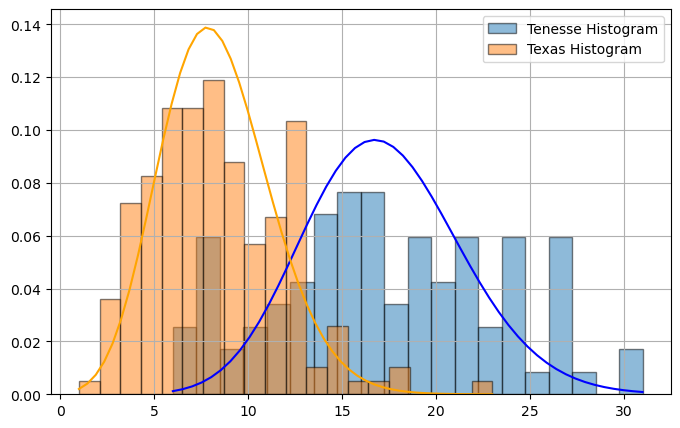

In [22]:
TN_df.Norm_deaths.hist(density=True, bins=20, ec='black', figsize=(8,5), alpha=0.5 , label = "Tenesse Histogram")
plt.plot(np.linspace(TN_df.Norm_deaths.min(), TN_df.Norm_deaths.max()), poisson.pmf(np.linspace(TN_df.Norm_deaths.min(), TN_df.Norm_deaths.max()), TN_lamda) ,  color = "blue")

TX_df.Norm_deaths.hist(density=True, bins=20, ec='black', figsize=(8,5) , alpha=0.5 , label = "Texas Histogram" )
plt.plot(np.linspace(TX_df.Norm_deaths.min(), TX_df.Norm_deaths.max()), poisson.pmf(np.linspace(TX_df.Norm_deaths.min(), TX_df.Norm_deaths.max()), TX_lamda) ,  color = "orange")
plt.legend()

#### MLE  for Tenesse and Texas State

C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\1494491831.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  l1,=plt.plot(x, poisson.pmf(x, TN_lamda), 'r--',  label="Maximum Likelihood Estimate" ,  color = "blue")
C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\1494491831.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  l1,=plt.plot(x, poisson.pmf(x, TX_lamda), 'b--',  label="Maximum Likelihood Estimate" ,  color = "orange")


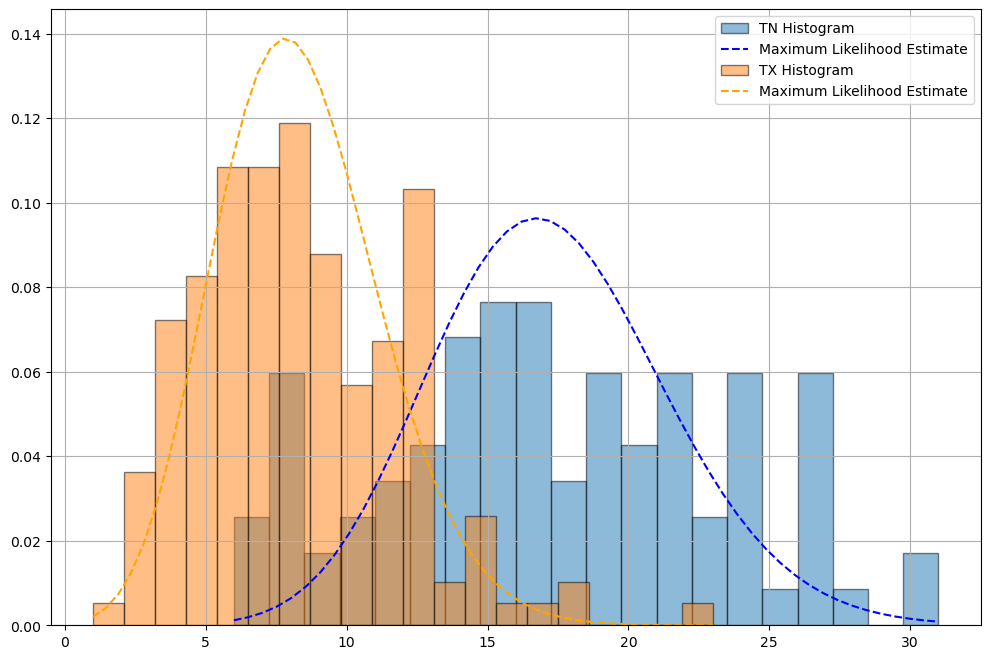

In [23]:
TN_df.Norm_deaths.hist(density=True, bins=20, ec='black', figsize=(12,8) , alpha=0.5 , label="TN Histogram")
x = np.linspace(TN_df.Norm_deaths.min(), TN_df.Norm_deaths.max())
l1,=plt.plot(x, poisson.pmf(x, TN_lamda), 'r--',  label="Maximum Likelihood Estimate" ,  color = "blue")

TX_df.Norm_deaths.hist(density=True, bins=20, ec='black', figsize=(12,8) , alpha=0.5 , label="TX Histogram")
x = np.linspace(TX_df.Norm_deaths.min(), TX_df.Norm_deaths.max())
l1,=plt.plot(x, poisson.pmf(x, TX_lamda), 'b--',  label="Maximum Likelihood Estimate" ,  color = "orange")
plt.legend()

#### KDE for Tenesse and Texas State

C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\1286049402.py:7: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(KY_kde, bw_method=None)
C:\Users\p_bud\AppData\Local\Temp\ipykernel_676\1286049402.py:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(TX_kde, bw_method=None)


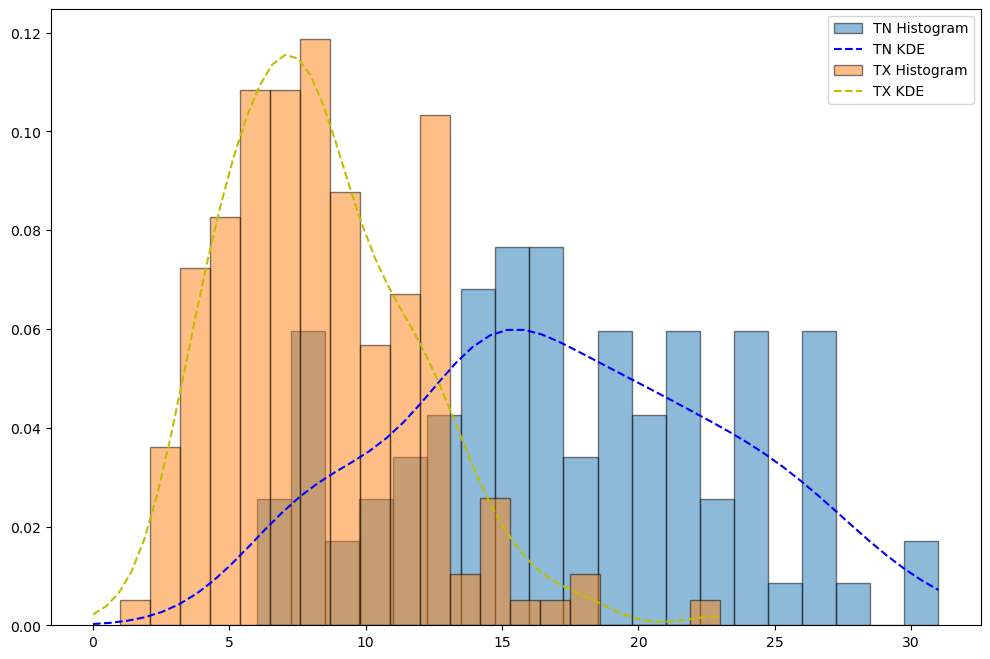

In [24]:
from scipy.stats import kde

KY_kde = TN_df.Norm_deaths

KY_kde.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8) , alpha=0.5 , label="TN Histogram")
x = np.linspace(0, KY_kde.max())
density = kde.gaussian_kde(KY_kde, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'b--' , label="TN KDE")


TX_kde = TX_df.Norm_deaths
TX_kde.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8) , alpha=0.5 , label="TX Histogram")
x = np.linspace(0, TX_kde.max())
density = kde.gaussian_kde(TX_kde, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'y--' , label="TX KDE")
plt.legend()

###  Inference for TN and TX states

Looking at the above graphs, we trying to understand the distribution which estimator fits the data best. If we observe all the three methods i.e MOM , MLE and KDE all of the them fit the data well.

MOM : 
* The probability of finding the mean of Texas is 0.14 and that of kentucky is 0.9. 
* Since the data fits well with the poison distribution and the variable is a discrete variable we will choose lamda as estimator parameter. This is nothing but the mean of the deaths for both the states. 

MLE: 

* In MLE, the probability of mean for TN and TX states are 0.14 and 0.9. Since we are trying find the best parameter for theta we use lamda which is nothing but the mean of deaths. 

* The distribution using MLE estimator fits best and poisson distribution works very well for this data. 

KDE: 
* This is a non-parametric estimator and also fits the data well. In case of parametric distribution which can obtained using seaborn plot function, the bandwidth has to be adjusted in order to obtain a smoother curve. 

All three estimators fit the data well compared to the NC and KY states. 


#### References: 

* https://github.com/UNCG-CSE/CSC-605_Fall_2022/blob/main/Class_Resources/Lecture_06/Statistics/02_Distribution.ipynb

* https://github.com/UNCG-CSE/CSC-605_Fall_2022/blob/main/Class_Resources/Lecture_06/Statistics/03_Distribution_Estimators.ipynb
